<a href="https://colab.research.google.com/github/Sharad-t/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - **Unsupervised**
##### **Contribution**    - **Individual**
##### **Team Member**     - **Sharad Tiwari**

# **Project Summary -**

The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

 Additionally, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry.


* **Handling Null Values: Null values in the dataset were addressed to ensure data integrity and accuracy**

* **Managing Nested Columns: Columns containing nested data, such as director, cast, listed_in, and country, were processed to enable better visualization and analysis**

* **Binning Ratings: The rating attribute was binned into categories such as adult, children's, family-friendly, and not rated to facilitate analysis and recommendation**

* **Exploratory Data Analysis (EDA): EDA techniques were employed to gain insights and understand patterns and trends in the dataset, with the goal of preventing subscriber churn**


# **GitHub Link -**

**https://github.com/Sharad-t/Netflix-Movies-and-TV-Shows-Clustering**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [46]:
# Import Libraries


# Pandas for data manipulation
import unicodedata
import re
from nltk.tokenize import TweetTokenizer
import string
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import nltk
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Numerical python for dealing with maths or arrays
import numpy as np

# from matplotlib pyplot for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn  for data visualization
import seaborn as sns
sns.set()

# KMeans Algorithm for Clustering
from sklearn.cluster import KMeans

# DBSCAN Algorithm for Clustering
from sklearn.cluster import DBSCAN

# Library for Finding out the Silhoutte Score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Date-Time for Converting Date and Time
from datetime import datetime as dt


# Warnings for Ignoring Waring Messages
import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Load Dataset
df = pd.read_csv(
'/content/drive/MyDrive/Capstone Projects/{Capstone Project -4 } (ML Clustering) Netflix_Movies_and_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
# df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [49]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [50]:
# Dataset Rows & Columns count

print('The Total Count of Rows and Columns in the dataset are :-',
      df.shape, ('(Rows , Columns)'))

The Total Count of Rows and Columns in the dataset are :- (7787, 12) (Rows , Columns)


### Dataset Information

In [51]:
# Dataset Info

print('Some of the Basic Information about the Data set like data type, Total count and Column Names are :-\n')

df.info()

Some of the Basic Information about the Data set like data type, Total count and Column Names are :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [52]:
# Dataset Duplicate Value Count

print('This Data has no Duplicate Values\n')

df[df.duplicated()]

This Data has no Duplicate Values



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [53]:
# Missing Values/Null Values Count

print(df.isna().sum())

# Finding out Missing Values by Using List Comprehension

missing = [features for features in df.columns if df[features].isna().sum() > 0]

print(f"\n{missing} are the feature which is having missing Values ")

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

['director', 'cast', 'country', 'date_added', 'rating'] are the feature which is having missing Values 


the Missing Values are: - 3631 in total as we can see them properly in heatmap 



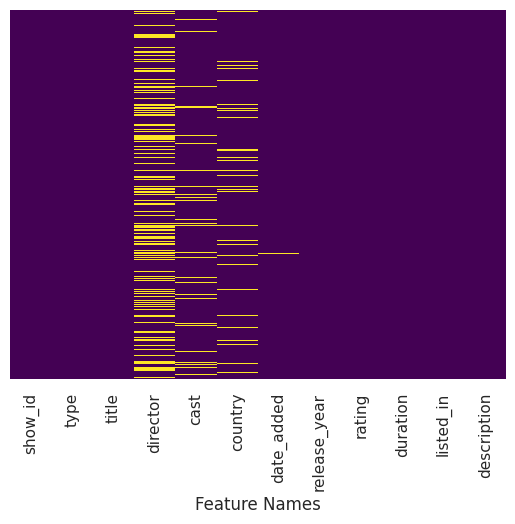

In [54]:
# Visualizing the missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Feature Names')

print(
    f'the Missing Values are: - {df.isna().sum().sum()} in total as we can see them properly in heatmap \n')

### What did you know about your dataset?

**The Dataset has Several Missing and NaN Value with which we have to deal**

## ***2. Understanding Your Variables***

In [55]:
# Dataset Columns

print('The Name of Features are :-\n', df.columns)

The Name of Features are :-
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [56]:
# Dataset Describe

print('Describe Method Gives us the 5 Number Summary about the Dataset Numercial Features \n here is the Small Description of dataset\n')

df.describe(include='all')

Describe Method Gives us the 5 Number Summary about the Dataset Numercial Features 
 here is the Small Description of dataset



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast** : Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration** : Total Duration - in minutes or number of seasons

* **listed_in** : Genere

* **description**: The Summary description

### Check Unique Values for each variable.

In [57]:
# Check Unique Values for each variable.

print(
    f'the number of Unique Values in Each Variables are as Follows: -\n {df.nunique()}')

the number of Unique Values in Each Variables are as Follows: -
 show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [58]:
# Write your code to make your dataset analysis ready.

# Imputing No Cast to Cast Feature where we had Null Values
df['cast'].fillna(value='No cast', inplace=True)

# Imputing Mode of the Country feature where we had Null Values
df['country'].fillna(value=df['country'].mode()[0], inplace=True)

# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

### What all manipulations have you done and insights you found?

* Imputed Mode of the Country Feature at the Place of Null Values
* Imputed No Cast in Cast Feature at the Place of Null Values


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

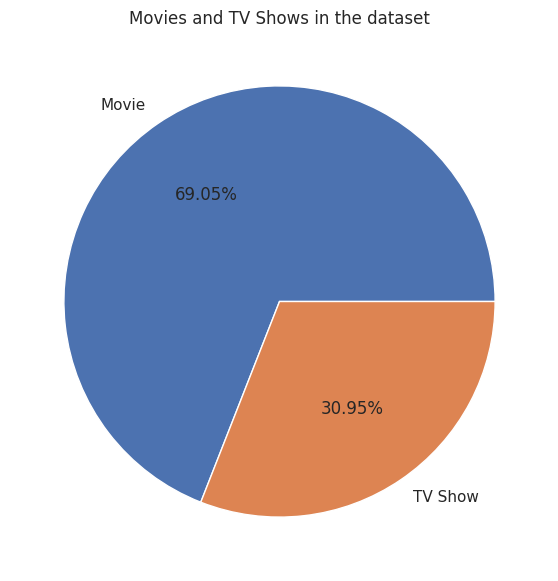

In [59]:
# Chart - 1 visualization code

plt.figure(figsize=(7, 7))
df.type.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

**Pie Chart are those type of charts which can reperesent the Percentage Division Properly.**

##### 2. What is/are the insight(s) found from the chart?

**After using the Pie Chart We got to know that out of there are more than 69% are from Movies Type and 31% are from TV Shows Type. Means There are More Movies than TV shows on Netflix**

#### Chart - 2

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

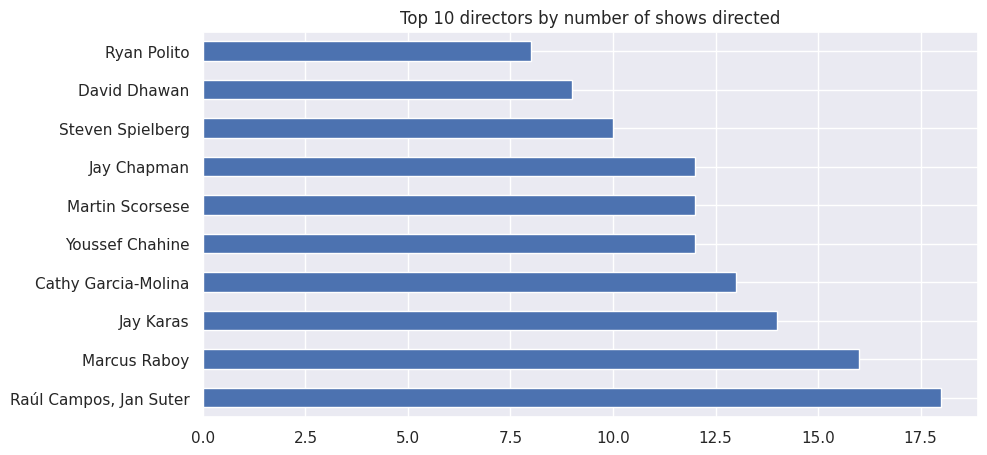

In [60]:
# Chart - 2 visualization code

plt.figure(figsize=(10, 5))
df[~(df['director'] == 'Unknown')].director.value_counts().nlargest(
    10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?

**Bar charts are very useful in presenting the numbers. as the above chart is clearly presenting that raul campos and jan suter have directed the maximum number of movies or TV Shows.**

##### 2. What is/are the insight(s) found from the chart?

**Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

#### Chart - 3

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

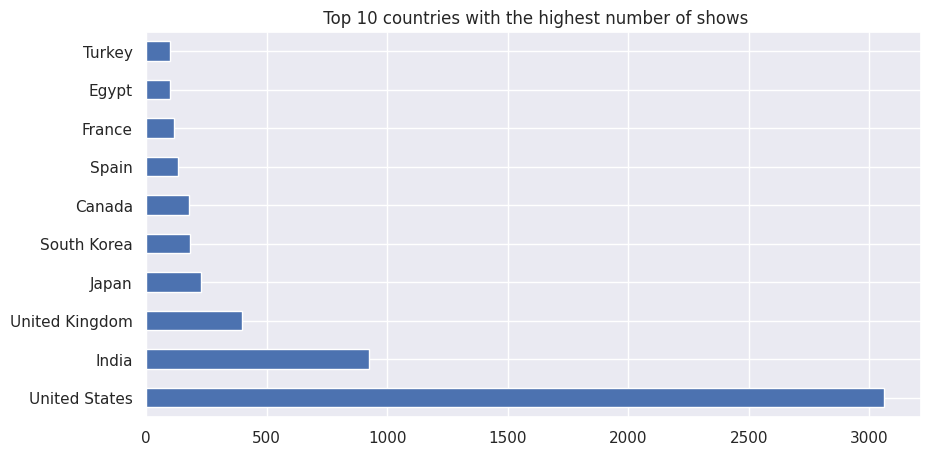

In [61]:
# Chart - 3 visualization code

plt.figure(figsize=(10, 5))
df[~(df['country'] == 'Unknown')].country.value_counts().nlargest(
    10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

**Bar Charts are used for representing the Number Efficiently. Thats why i have used the Bar chart.**

##### 2. What is/are the insight(s) found from the chart?

**The highest number of movies / TV shows were based out of the US, followed by India and UK.**

#### Chart - 4

Text(0.5, 1.0, 'Top 10 genres')

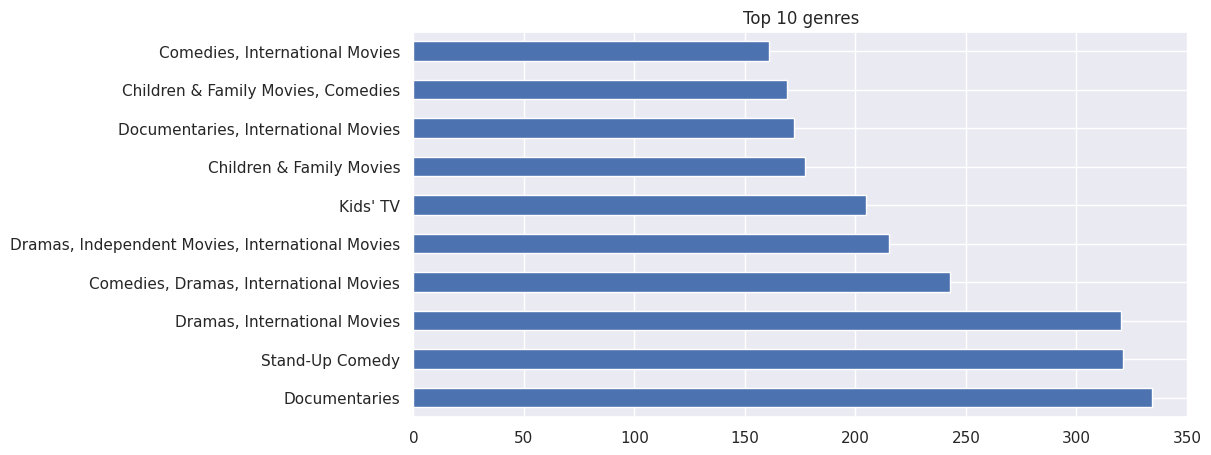

In [62]:
# Chart - 4 visualization code

plt.figure(figsize=(10, 5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

**Here i am using the number of Genres so for representing the Number the Bar Charts are one of the Best Charts.**

##### 2. What is/are the insight(s) found from the chart?

* **The Documentaries is the most popular genre followed by comedies and Drama.**
* **These three genres account for about 41% of all movies and TV shows.**
* **This value increases to about 82% for top 10 genres.**

#### Chart - 5

Text(0.5, 1.0, 'distribution by released year')

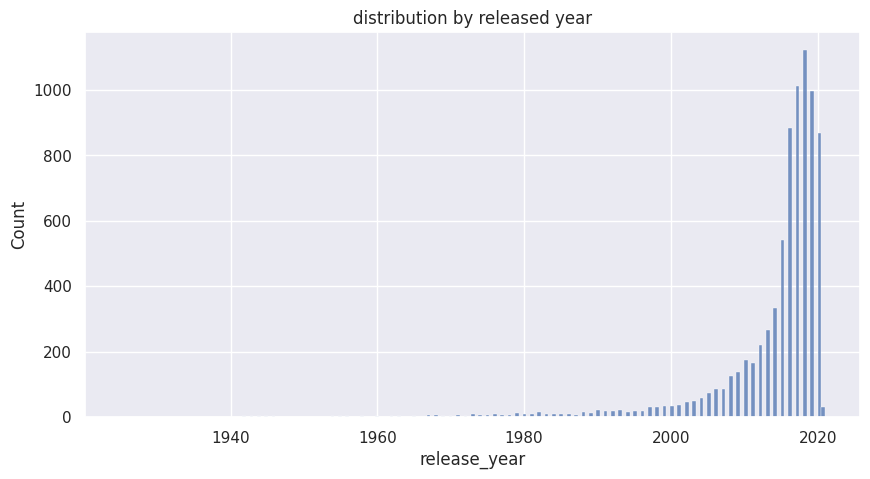

In [63]:
# Chart - 5 visualization code

plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

**Histogram is the Chart which is used for getting the understanding about the Distribution of data, and here our motive is to check the Distribution of Release year of Movies. Thats why i have used Histogram**

##### 2. What is/are the insight(s) found from the chart?

**Netflix has greater number of new movies / TV shows than the old ones.**

#### Chart - 6

Text(0, 0.5, 'Months')

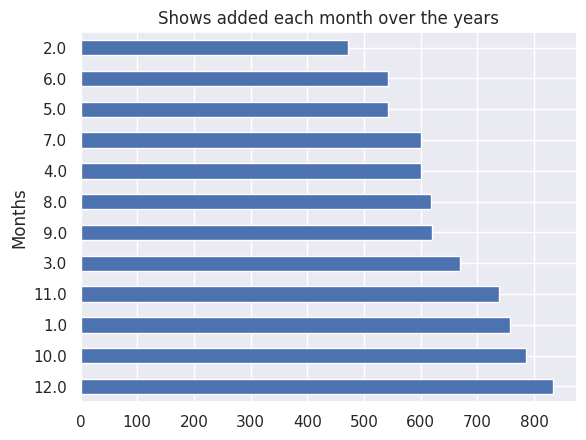

In [64]:
# Chart - 6 visualization code

df['month_added'].value_counts().astype(int).plot(kind='barh')
plt.title('Shows added each month over the years')
plt.ylabel('Months')

##### 1. Why did you pick the specific chart?

**Here the Aim is to find out how many Shows or Movies got Added Over the Years, And for that Reason we have used Horizontal Bar Chart.**

##### 2. What is/are the insight(s) found from the chart?

 **Over the years a greater number of shows were added in the months of October, November, December, and January.**

#### Chart - 7

Text(0.5, 0, '')

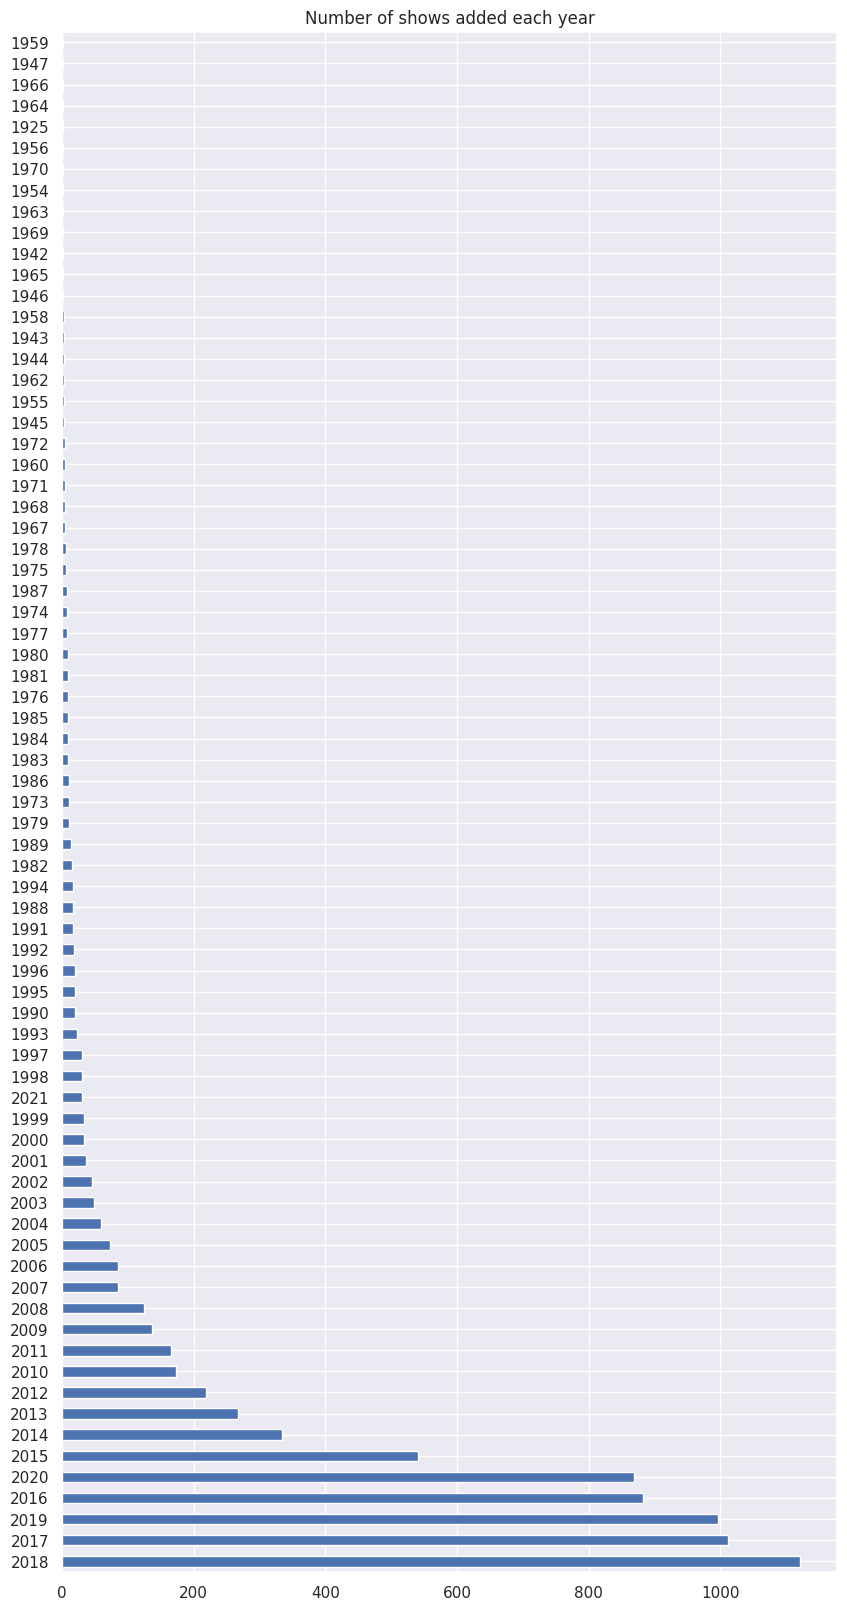

In [65]:
# Chart - 7 visualization code

plt.figure(figsize=(10, 20))
df['release_year'].value_counts().plot(kind='barh',)
plt.title('Number of shows added each year')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

**Bar Charts are one of the best Options available Because the Bar charts are used to represent the Comparision. and here our motive is to find out the number of movies or Tv shows added Every Year on Netflix.**

##### 2. What is/are the insight(s) found from the chart?

* **Netflix continuous to add more shows on its platform over the years.**
* **There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.**
* **We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.**

#### Chart - 8

In [66]:
# Changing the values in the rating column

rating_map = {'TV-MA': 'Adults',
              'R': 'Adults',
              'PG-13': 'Teens',
              'TV-14': 'Young Adults',
              'TV-PG': 'Older Kids',
              'NR': 'Adults',
              'TV-G': 'Kids',
              'TV-Y': 'Kids',
              'TV-Y7': 'Older Kids',
              'PG': 'Older Kids',
              'G': 'Kids',
              'NC-17': 'Adults',
              'TV-Y7-FV': 'Older Kids',
              'UR': 'Adults'}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

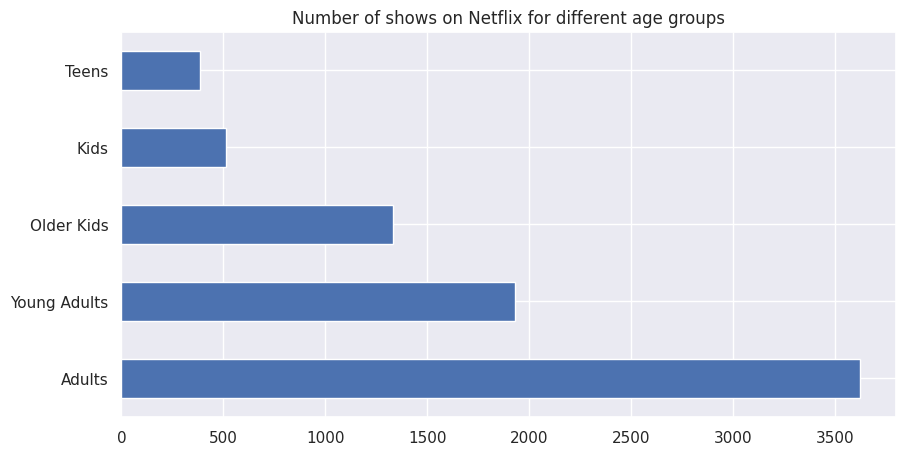

In [67]:
# Chart - 8 visualization code

plt.figure(figsize=(10, 5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

##### 1. Why did you pick the specific chart?

**A bar chart shows the frequency of each data category.**

##### 2. What is/are the insight(s) found from the chart?

**The majority of the shows on Netflix are catered to the needs of adult and young adult population.**

#### Chart - 9

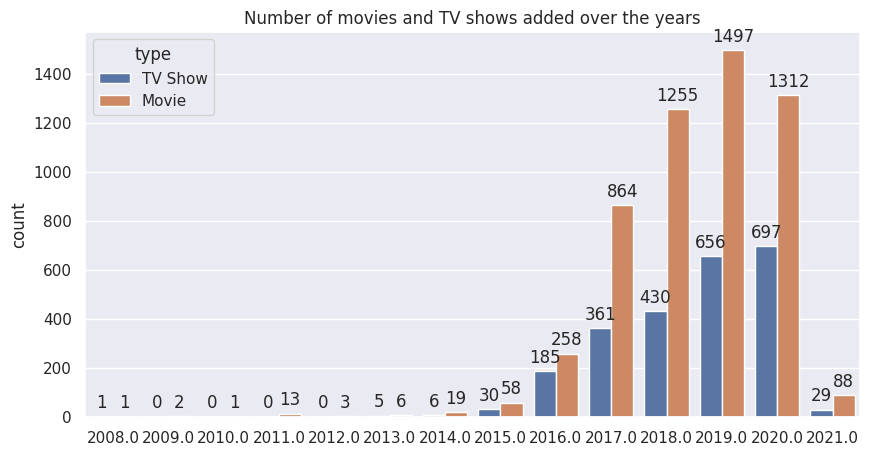

In [68]:
# Chart - 9 visualization code

plt.figure(figsize=(10, 5))
p = sns.countplot(x='year_added', data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##### 1. Why did you pick the specific chart?

**CountPlots are mainly used for Representing the Numbers differnce Between Categories. and here our motive is to check how many movies and Tv Shows are Added year per year in netflix**

##### 2. What is/are the insight(s) found from the chart?

* **Netflix continuous to add more shows on its platform over the years.**
* **There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.**


#### Chart - 10

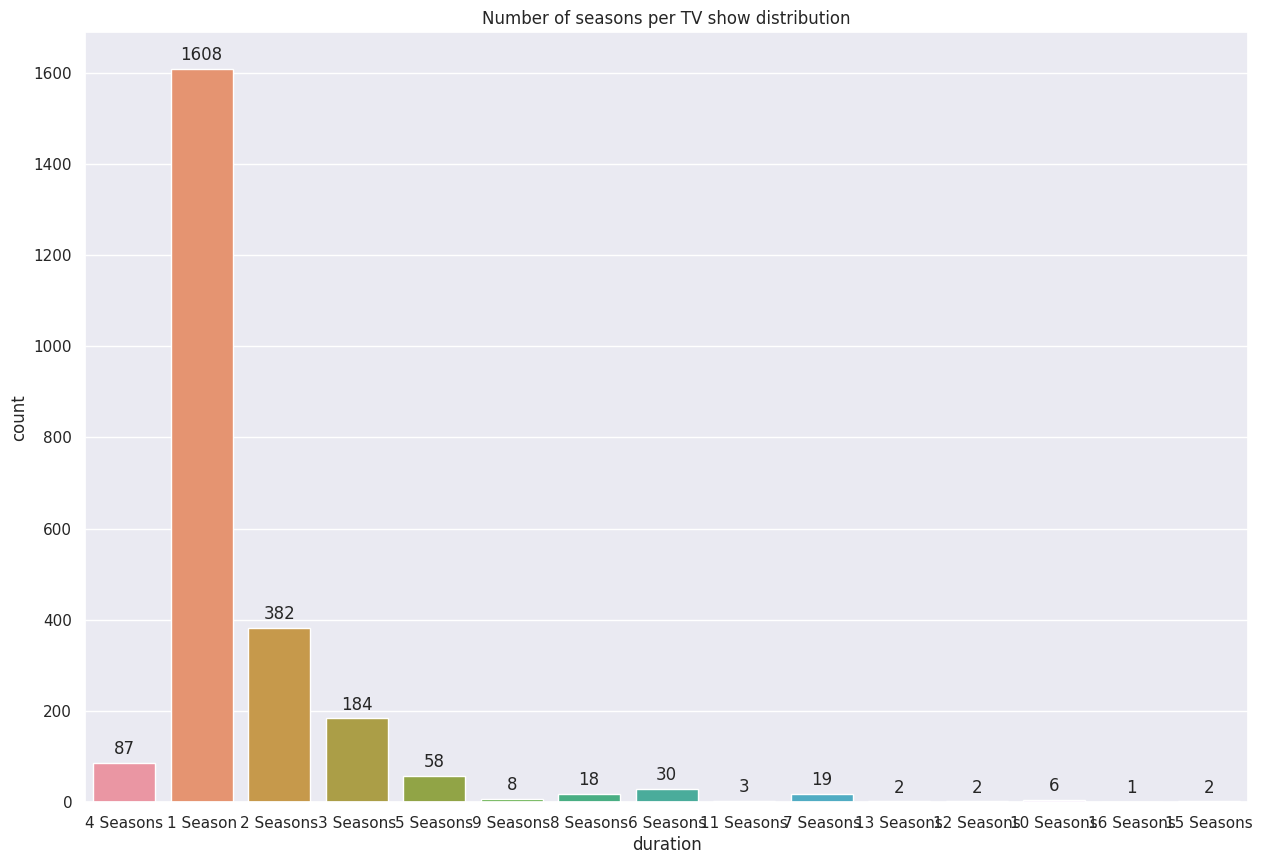

In [69]:
# Chart - 10 visualization code

plt.figure(figsize=(15, 10))
p = sns.countplot(x='duration', data=df[df['type'] == 'TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##### 1. Why did you pick the specific chart?

**CountPlot Used to determine the Numerical Difference between Categories. we wanted to know the number of season in TV shows.**

##### 2. What is/are the insight(s) found from the chart?

* **The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Alternate Hypothesis(H1):The duration which is more than 90 mins are movies**
*    **Null Hypothesis  (HO):The duration which is more than 90 mins are NOT movies**

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value

# Creating a Copy for Hypothesis Testing
hypo_df = df.copy()

# Extracting the String part

hypo_df['duration'] = hypo_df['duration'].str.extract('(\d+)')

# Converting the Duration to Numerical

hypo_df['duration'] = pd.to_numeric(hypo_df['duration'])

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [73]:
# Handling Missing Values & Missing Value Imputation

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast               0
country            0
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

###  Directors

In [74]:
# handling Missing Values for Director Variable

df['director'] = df['director'].fillna('Unknown Director')

### Ratings


In [75]:
# handling Missing Values for Rating Variable

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [76]:
# Dropping the other Null Values because these are only 10 data points
df.dropna(axis=0, inplace=True)

In [77]:
# Checking for Null or Missing Values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* **I have Imputed the 'Unknown Director' to the missing or null values of the director Variable**

* **and Imputed mode of Ratings to the missing or Null Values of the Rating Variable**

In [78]:
# Making a Copy of the Original Dataset Before Data Pre-Processing
df1 = df.copy()

In [79]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] + ' ' +
                                df1['country'] + ' ' +
                                df1['listed_in'] + ' ' +
                                df1['description'])

### 2. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### Lower Casing and Removing Punctuations

In [80]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [81]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(
    remove_punctuation)

####  Removing Stopwords & Removing White spaces

In [82]:
# Remove Stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [83]:
# function to remove stop words

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [84]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

#### Tokenization

In [85]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [86]:
# Tokenization
def identity_tokenizer(text):
    return text


# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,
                        stop_words='english', lowercase=False, max_features=20000)
X = tfidf.fit_transform(clustering_data)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [87]:
# Manipulate Features to minimize feature correlation and create new features
# Not Needed

#### 2. Feature Selection

In [88]:
# Select your features wisely to avoid overfitting

# I Have Selected the [ Director, Description, Listed in (genres), Country, Cast]
# Variables for Clustering

##### Which all features you found important and why?

**I will cluster the shows on Netflix based on the following attributes:**
* Director
* Cast
* Country
* Listed in (genres)
* Description

### Data Transformation

###  Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [89]:
# DImensionality Reduction (If needed)
clustering_data

0       unknown director joão miguel bianca comparato ...
1       jorge michel grau demián bichir héctor bonilla...
2       gilbert chan tedd chan stella chung henley hii...
3       shane acker elijah wood john c reilly jennifer...
4       robert luketic jim sturgess kevin spacey kate ...
                              ...                        
7782    josef fares imad creidi antoinette turk elias ...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784    unknown director nasty c united states documen...
7785    unknown director adriano zumbo rachel khoo aus...
7786    sam dunn cast united kingdom canada united sta...
Name: clustering_attributes, Length: 7777, dtype: object

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [90]:
# ML Model - 1 Implementation


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [95]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [98]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [99]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**By conducting this comprehensive analysis of the Netflix dataset and developing a content-based recommendation system, the project aims to enhance user satisfaction and reduce subscriber churn for Netflix. The clustering of content allows for improved grouping and organization, while the recommender system provides personalized recommendations based on user preferences. It is expected that these efforts will lead to higher user retention rates and ultimately benefit Netflix in maintaining its position as a leading streaming entertainment platform.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***